<a href="https://colab.research.google.com/github/bustercherries/ML/blob/main/Apartment_prices_in_Poland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install ydata-profiling

In [72]:
! pip install optuna

In [73]:
!pip install shap

In [74]:
import pandas as pd
from sklearn.impute import SimpleImputer
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import sklearn.ensemble
import sklearn.model_selection
import optuna
import shap
#from config import config


In [75]:
#config = {"Target: targets"}

In [76]:
from pathlib import Path
path = Path.cwd()
main_path = '/content/drive/MyDrive/Machine_Learning/dataset/apartments_pl_2023_'
august = pd.read_csv(path.joinpath(main_path + '08.csv'))

all_months = []
list_of_months = ['08.csv','09.csv', '10.csv','11.csv']
all_months = [pd.read_csv(path.joinpath(main_path + month)) for month in list_of_months]

In [77]:
list_of_months[2]
all_months[0]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,ae88d7ea0a7a5fa0e9d287cfd78e5676,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,...,0.164,cooperative,brick,NaN,yes,yes,no,no,yes,789000
18901,6a4b30b5fcdee00bfe5bcc0da82df9b1,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,...,0.428,condominium,NaN,NaN,no,yes,no,no,yes,699000
18902,1e7f4f1fdfea31eb84e071d697839632,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,...,0.205,condominium,brick,NaN,yes,no,no,no,no,360000
18903,d971c4ed3aab9919bf203e96019a678e,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,...,0.205,condominium,brick,premium,yes,yes,no,no,yes,590000


In [78]:
type(august)

pandas.core.frame.DataFrame

In [79]:
#coverting list into dataframe
df=pd.concat(all_months)

In [80]:
#checking how much data is missing based on the features
df.isna().sum()

id                          0
city                        0
type                    15278
squareMeters                0
rooms                       0
floor                   12472
floorCount                956
buildYear               11935
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             69
clinicDistance            319
postOfficeDistance         95
kindergartenDistance       68
restaurantDistance        193
collegeDistance          2021
pharmacyDistance          107
ownership                   0
buildingMaterial        26791
condition               51924
hasParkingSpace             0
hasBalcony                  0
hasElevator              3545
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64

In [81]:
df.info

<bound method DataFrame.info of                                      id       city          type  \
0      f8524536d4b09a0c8ccc0197ec9d7bde   szczecin  blockOfFlats   
1      accbe77d4b360fea9735f138a50608dd   szczecin  blockOfFlats   
2      8373aa373dbc3fe7ca3b7434166b8766   szczecin      tenement   
3      0a68cd14c44ec5140143ece75d739535   szczecin      tenement   
4      f66320e153c2441edc0fe293b54c8aeb   szczecin  blockOfFlats   
...                                 ...        ...           ...   
16297  6a4b30b5fcdee00bfe5bcc0da82df9b1  bydgoszcz  blockOfFlats   
16298  1e7f4f1fdfea31eb84e071d697839632  bydgoszcz           NaN   
16299  60fcbfa2a2a48ebcc2e554efba7f2729  bydgoszcz      tenement   
16300  cd0241b70b79aaaf767a0dd3a7cfbb31  bydgoszcz           NaN   
16301  1cdf62d567c6be2fa488f16ad9939c3a  bydgoszcz  blockOfFlats   

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
0             63.00    3.0    4.0        10.0     1980.0  53.378933   
1        

In [82]:
#deleting the bigger lacks of data (the bigger the harder is to fill those with average or median)
#additionally deleting some not needed for this model features such as id and type
df.drop(['id','type','city', 'floor', 'buildYear', 'ownership', 'buildingMaterial', 'condition','hasParkingSpace','hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom'], axis = 1, inplace = True)

In [83]:
# if there are duplicates, drop them
df_clean = df.drop_duplicates().reset_index(drop=True)

In [84]:
df.isna().sum()

squareMeters               0
rooms                      0
floorCount               956
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance            69
clinicDistance           319
postOfficeDistance        95
kindergartenDistance      68
restaurantDistance       193
collegeDistance         2021
pharmacyDistance         107
price                      0
dtype: int64

In [85]:
df.info

<bound method DataFrame.info of        squareMeters  rooms  floorCount   latitude  longitude  centreDistance  \
0             63.00    3.0        10.0  53.378933  14.625296            6.53   
1             36.00    2.0        10.0  53.442692  14.559690            2.15   
2             73.02    3.0         3.0  53.452222  14.553333            3.24   
3             87.60    3.0         3.0  53.435100  14.532900            2.27   
4             66.00    3.0         3.0  53.410278  14.503611            4.07   
...             ...    ...         ...        ...        ...             ...   
16297         94.30    4.0         2.0  53.115921  17.956396            3.04   
16298         50.12    2.0         1.0  53.129657  18.003888            0.88   
16299         59.10    2.0         1.0  53.126000  18.007900            0.65   
16300         81.07    5.0         4.0  53.115921  17.956396            3.04   
16301        133.16    4.0         3.0  53.112086  17.989945            1.32   

       

In [86]:
#korzystam z imputera do wypełnienia brakujących danych
#imputer = SimpleImputer(strategy="median")

In [87]:
# filling smaller lacks of data with median
col_list = ['floorCount','schoolDistance','clinicDistance','postOfficeDistance','kindergartenDistance','restaurantDistance','collegeDistance','pharmacyDistance']
for col in col_list:
  df[col] = df[col].fillna(df[col].median())

In [88]:
#checking if filling with median worked
df.isna().sum()

squareMeters            0
rooms                   0
floorCount              0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
price                   0
dtype: int64

In [89]:
#getting correlation
df.corr()

,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
squareMeters,1.000000,0.825974,-0.139818,0.029579,-0.021166,0.080498,0.007924,0.072223,0.023227,0.055445,0.070618,0.038086,0.045185,0.063076,0.622552
rooms,0.825974,1.000000,-0.085379,0.027630,-0.000806,0.076920,-0.021636,0.071861,0.045978,0.057066,0.064606,0.053877,0.058350,0.064617,0.486429
floorCount,-0.139818,-0.085379,1.000000,-0.009787,0.109110,-0.033301,0.035597,-0.132700,-0.171592,-0.108256,-0.130295,-0.125366,-0.063914,-0.134219,0.035252
latitude,0.029579,0.027630,-0.009787,1.000000,-0.222065,0.093526,-0.058118,0.180044,0.139677,0.123708,0.201900,0.173240,0.108640,0.165848,0.011982
longitude,-0.021166,-0.000806,0.109110,-0.222065,1.000000,0.188637,0.024387,-0.098064,-0.062554,-0.046128,-0.137055,-0.110361,0.002641,-0.065368,0.211884
centreDistance,0.080498,0.076920,-0.033301,0.093526,0.188637,1.000000,-0.456606,0.290990,0.433150,0.267453,0.145288,0.227968,0.511342,0.259036,0.131620
poiCount,0.007924,-0.021636,0.035597,-0.058118,0.024387,-0.456606,1.000000,-0.305095,-0.373228,-0.323123,-0.211470,-0.340658,-0.432318,-0.300785,0.162226
schoolDistance,0.072223,0.071861,-0.132700,0.180044,-0.098064,0.290990,-0.305095,1.000000,0.552224,0.771638,0.798227,0.778575,0.323815,0.814789,0.015009
clinicDistance,0.023227,0.045978,-0.171592,0.139677,-0.062554,0.433150,-0.373228,0.552224,1.000000,0.496379,0.454806,0.520275,0.441519,0.510527,-0.099670
postOfficeDistance,0.055445,0.057066,-0.108256,0.123708,-0.046128,0.267453,-0.323123,0.771638,0.496379,1.000000,0.749124,0.782032,0.250702,0.816747,-0.012879


In [90]:
#report = ProfileReport(df, title='My Data',correlations = {"pearson": {"calculate": True},"spearman": {"calculate": True},"kendall": {"calculate": True}})

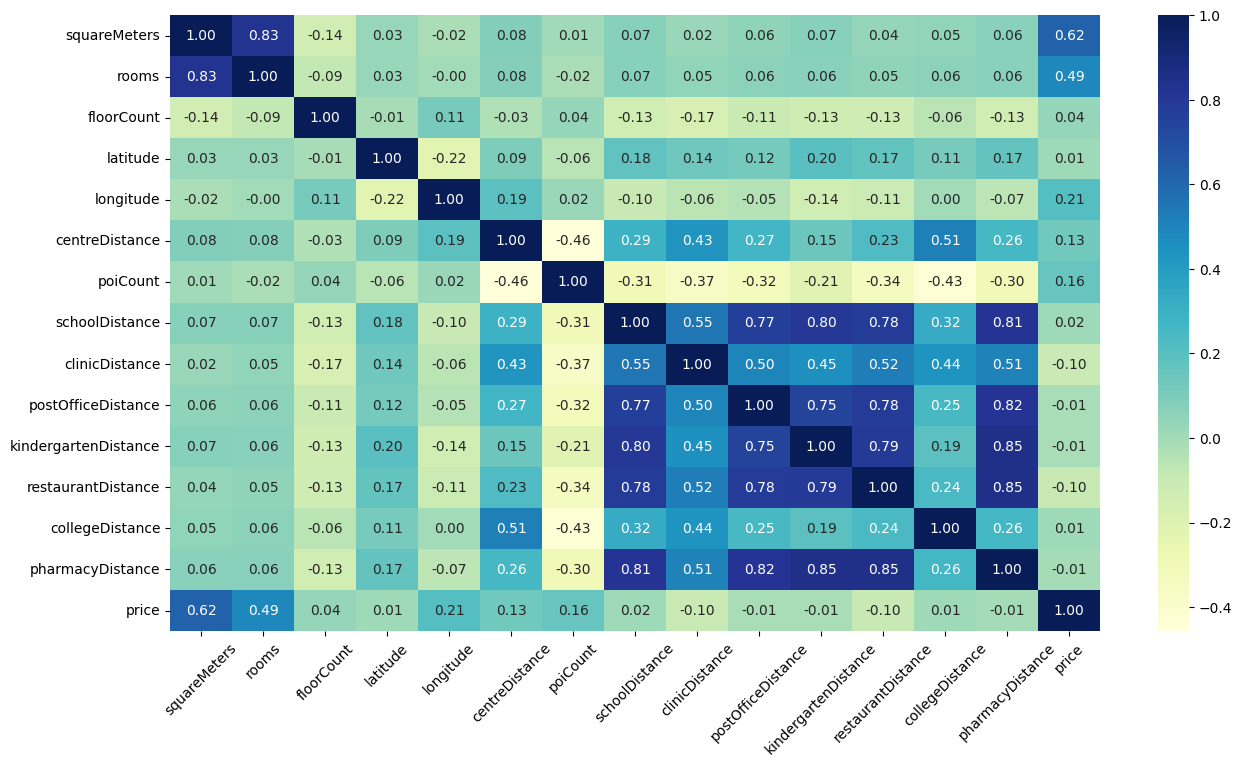

In [91]:
#correlation in a nicer look
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, fmt = '.2f')
plt.xticks(rotation=45);

In [92]:
# let's establish X and y - here is my question: imputing with median doesn't badly influence on the data used for model?
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [93]:
y_train

5021     519000
13658    660000
10808    491000
2567     590000
4923     550000
          ...  
10614    239000
8812     237000
17730    533000
9125     309000
15725    799000
Name: price, Length: 55115, dtype: int64

In [94]:
# standarizing the data - but only the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [95]:
X_train_scaled

array([[-0.86787988, -0.75223229, -0.36989434, ..., -0.33487739,
         0.42258859,  0.0183914 ],
       [-1.01851198, -0.75223229, -0.67847555, ..., -0.35366928,
        -0.55157438, -0.53928246],
       [ 1.08563023,  1.44696581,  1.48159293, ..., -0.2638858 ,
        -0.54333427,  0.12612385],
       ...,
       [-0.46776335,  0.34736676,  1.48159293, ..., -0.25344586,
        -0.29155343, -0.22453471],
       [-0.24887607,  0.34736676, -0.36989434, ...,  0.39174242,
         1.21272266, -0.44211201],
       [-0.13825562,  0.34736676, -0.36989434, ..., -0.11146268,
        -0.64129991, -0.54561966]])

In [96]:
# checking the variance but for standarized data
#variances = X_train_scaled[['squareMeters','rooms', 'floorCount','centreDistance']].var()
#variances

In [97]:
#using model XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [98]:
# making predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluating predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# evaluating predictions
mse = mean_squared_error(y_test, predictions)
print("MSE: {0}".format(mse))

Accuracy: 0.00%
MSE: 12481039426.75303


In [99]:
#using Random Forest regressor model
rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101, n_jobs=-1, max_depth=9, oob_score=True)

In [100]:
model_rf = rf.fit(X_train, y_train)

# making predictions for test data
y_pred = model_rf.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluating predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# evaluating predictions
mse = mean_squared_error(y_test, predictions)
print("MSE: {0}".format(mse))


Accuracy: 0.01%
MSE: 18980194169.150158


In [101]:
#back to establishing the X and Y - this time trying sth different
X1 = df[['squareMeters', 'rooms', 'centreDistance']]
Y1 = df[['price']]

seed = 123
test_size = 0.2
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=test_size, random_state=seed)
Y1

,price
0,415000
1,395995
2,565000
3,640000
4,759000
...,...
16297,795000
16298,360000
16299,320000
16300,679000


In [102]:
# standarizing the data - but only the features
scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

In [103]:
#using model XGBRegressor
model = XGBRegressor()
model.fit(X1_train_scaled, y1_train)

print(model)
# making predictions for test data
y1_pred = model.predict(X1_test_scaled)
predictions = [round(value) for value in y1_pred]

# evaluating predictions
accuracy = accuracy_score(y1_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# evaluating predictions
mse = mean_squared_error(y1_test, predictions)
print("MSE: {0}".format(mse))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.00%
MSE: 69755375673.54677


In [107]:
X1_test_scaled

array([[ 0.3279969 ,  0.33716063,  0.07639212],
       [-1.18824888, -0.74930716, -0.69334775],
       [-0.97911153, -0.74930716, -0.40077694],
       ...,
       [-0.94736747, -0.74930716, -0.40774291],
       [-0.27887487,  0.33716063,  0.38289488],
       [-0.55896953, -0.74930716, -0.64458595]])

[16:04:26] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


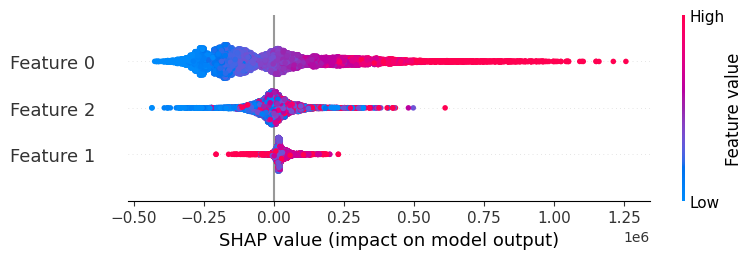

In [106]:
#addressing Shap Values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X1_test_scaled)

shap.summary_plot(shap_values, X1_test_scaled)

In [ ]:
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 2, 60)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    min_samples_split = trial.suggest_int('min_samples_split',2,120)

    clf = sklearn.ensemble.RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)

    return sklearn.model_selection.cross_val_score(
        clf, X, Y, n_jobs=-1, cv=3).mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-12-16 16:09:31,353] A new study created in memory with name: no-name-5df4bb55-0e7e-41dd-b0dc-60d9a8afd13f
The least populated class in y has only 1 members, which is less than n_splits=3.
[I 2023-12-16 16:10:00,136] Trial 0 finished with value: 0.01873889983443448 and parameters: {'n_estimators': 9, 'max_depth': 2.7431759457461617, 'min_samples_split': 33}. Best is trial 0 with value: 0.01873889983443448.
The least populated class in y has only 1 members, which is less than n_splits=3.
